# Dataset Comparison : Title


In [22]:
### packages 

import numpy as np 
import pandas as pd

from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

## for explainer
from lime import lime_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import nltk
import string
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter("ignore")
from nltk import word_tokenize, corpus
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from nltk.corpus import stopwords
stopwords.words('english')
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn import tree

In [23]:
### Load data 

#look at data
df=pd.read_csv("processed_sentiment_data.csv").dropna()

###  label encoding 
#labels={"Negative": 0, "Neutral": 1, "Positive": 2}
#df = df.replace(labels)
df['processed'] = df['processed'].astype(str)
df

,Sentiment,lemma_meaningful,processed
0,Negative,"['app', 'use', 'rh', 'dead']",app use rh dead
1,Negative,['fud'],fud
2,Negative,"['amc', 'amc', 'amc', 'low', 'let', 'trade']",amc amc amc low let trade
3,Negative,"['serious', 'question', 'short', 'ladder', 'at...",serious question short ladder attack
4,Negative,"['til', 'fucking', 'fuck', 'billionaire', 'fuc...",til fucking fuck billionaire fucker
...,...,...,...
31614,Positive,"['robinhood', 'let', 'buy', 'gme', 'amc', 'fin...",robinhood let buy gme amc fine opened fidelity...
31615,Positive,"['help', 'get', 'tendies', 'deepfucking', 'val...",help get tendies deepfucking value part
31616,Positive,"['dont', 'sell', 'look', 'buy', 'dont', 'let',...",dont sell look buy dont let short win easy
31617,Positive,"['best', 'yet', 'come', 'got', 'others', 'back...",best yet come got others back let gme amc


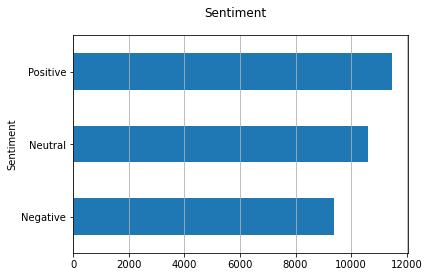

In [24]:
fig, ax = plt.subplots()
fig.suptitle("Sentiment", fontsize=12)
df["Sentiment"].reset_index().groupby("Sentiment").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

# Train/Test Split

In [25]:
## split dataset

X = df['processed'] # Collection of documents
y = df['Sentiment'] # Target: The sentiment we want to predict (3 classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['Sentiment'],random_state=25) #24


# Clssification and evaluation

# Logistic Regression

n_iterations: 10
n_required_iterations: 11
n_possible_iterations: 10
min_resources_: 30
max_resources_: 25169
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 1080
n_resources: 30
Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
----------
iter: 1
n_candidates: 540
n_resources: 60
Fitting 5 folds for each of 540 candidates, totalling 2700 fits
----------
iter: 2
n_candidates: 270
n_resources: 120
Fitting 5 folds for each of 270 candidates, totalling 1350 fits
----------
iter: 3
n_candidates: 135
n_resources: 240
Fitting 5 folds for each of 135 candidates, totalling 675 fits
----------
iter: 4
n_candidates: 68
n_resources: 480
Fitting 5 folds for each of 68 candidates, totalling 340 fits
----------
iter: 5
n_candidates: 34
n_resources: 960
Fitting 5 folds for each of 34 candidates, totalling 170 fits
----------
iter: 6
n_candidates: 17
n_resources: 1920
Fitting 5 folds for each of 17 candidates, totalling 85 fits
----------
iter: 7
n_candidates: 9

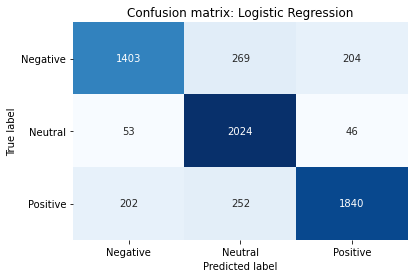

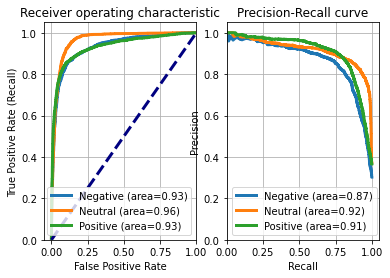

              precision    recall  f1-score   support

    Negative       0.85      0.75      0.79      1876
     Neutral       0.80      0.95      0.87      2123
    Positive       0.88      0.80      0.84      2294

    accuracy                           0.84      6293
   macro avg       0.84      0.83      0.83      6293
weighted avg       0.84      0.84      0.84      6293



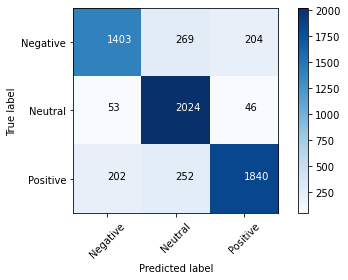

In [21]:
### build a pipeline
lg_pipe = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LogisticRegression(random_state=0)),])



### define parameters to be tested usign k-fold CV
lg_params = {'classifier__penalty': ['l2'],
             'classifier__C': [0.9, 0.8, 0.7],
             'vectorizer__max_df': (0.5, 0.6, 0.7),
             'vectorizer__min_df': [2,3,4],
             'vectorizer__stop_words': ['english', None],
             'classifier__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'vectorizer__use_idf': [True, False],
             'classifier__class_weight': [None, 'balanced'],
            }

### perform gridsearch using clf and params
lg_gs = HalvingGridSearchCV(lg_pipe,lg_params,cv=5,n_jobs=-1, verbose=1,scoring='accuracy', factor=2) #5-fold, n_jobs =-1 :computation will be dispatched on all the CPUs


### train best estimator on traning data 
lg_gs = lg_gs.fit(X_train, y_train)
print('Best score on testing data:',lg_gs.score(X_test, y_test))
print('Best score on training data:',lg_gs.score(X_train, y_train))
print('Best score',lg_gs.best_score_)
print('Best parameters',lg_gs.best_params_)


## test classifier 
y_pred = lg_gs.best_estimator_.predict(X_test)
predicted_prob = lg_gs.best_estimator_.predict_proba(X_test)



############################################## Evaluation ####################################################

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values


### Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Logistic Regression Details:")
print(metrics.classification_report(y_test, y_pred))
    
    
    
### Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Predicted label", ylabel="True label", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix: Logistic Regression")
plt.yticks(rotation=0)
fig, ax = plt.subplots(nrows=1, ncols=2)

### Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)

    
### Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()


### Confusion matrix vol 2.0
labels = ['Negative', 'Neutral', 'Positive'] 
print(classification_report(y_test, y_pred, labels)) #classification report from sklearn
cnf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues) #plot confusion matrix grid
threshold = cnf_matrix.max() / 2 #threshold to define text color
for i in range(cnf_matrix.shape[0]): #print text in grid
    for j in range(cnf_matrix.shape[1]): 
        plt.text(j, i, cnf_matrix[i,j], color="w" if cnf_matrix[i,j] > threshold else 'black')
tick_marks = np.arange(len(labels)) #define labeling spacing based on number of classes
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.tight_layout()

# Decision Tree Classifier

n_iterations: 10
n_required_iterations: 14
n_possible_iterations: 10
min_resources_: 30
max_resources_: 25169
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 13104
n_resources: 30
Fitting 5 folds for each of 13104 candidates, totalling 65520 fits
----------
iter: 1
n_candidates: 6552
n_resources: 60
Fitting 5 folds for each of 6552 candidates, totalling 32760 fits
----------
iter: 2
n_candidates: 3276
n_resources: 120
Fitting 5 folds for each of 3276 candidates, totalling 16380 fits
----------
iter: 3
n_candidates: 1638
n_resources: 240
Fitting 5 folds for each of 1638 candidates, totalling 8190 fits
----------
iter: 4
n_candidates: 819
n_resources: 480
Fitting 5 folds for each of 819 candidates, totalling 4095 fits
----------
iter: 5
n_candidates: 410
n_resources: 960
Fitting 5 folds for each of 410 candidates, totalling 2050 fits
----------
iter: 6
n_candidates: 205
n_resources: 1920
Fitting 5 folds for each of 205 candidates, totalling 1025 fits
----------
i

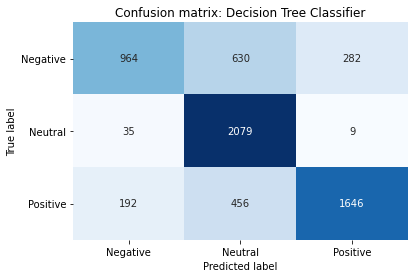

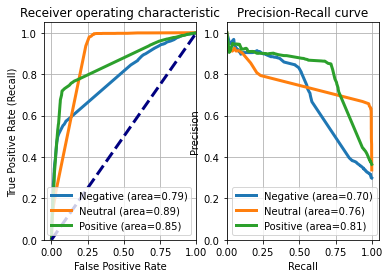

              precision    recall  f1-score   support

    Negative       0.81      0.51      0.63      1876
     Neutral       0.66      0.98      0.79      2123
    Positive       0.85      0.72      0.78      2294

    accuracy                           0.75      6293
   macro avg       0.77      0.74      0.73      6293
weighted avg       0.77      0.75      0.74      6293



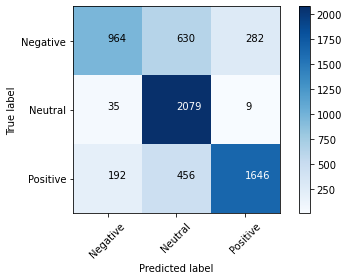

In [27]:
### build a pipeline
tree_pipe = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', DecisionTreeClassifier(random_state=0)),])
# see paramerts for model 
tree_pipe.get_params().keys()


### define parameters to be tested usign k-fold CV
tree_params = {'classifier__criterion': ['gini','entropy'],
               'classifier__ccp_alpha' : (0.001, 0.0013, 0.0015),
             'classifier__max_depth': range(109,200),
             'vectorizer__max_df': (0.6, 0.7,0.8),
             'vectorizer__min_df': [2,3],
             'vectorizer__stop_words': ['english', None],
             'vectorizer__use_idf': [True, False],
            }

### perform gridsearch using clf and params
tree_gs = HalvingGridSearchCV(tree_pipe,tree_params,cv=5,n_jobs=-1, verbose=1,scoring='accuracy', factor=2) #5-fold, n_jobs =-1 :computation will be dispatched on all the CPUs


### train best estimator on traning data 
tree_gs = tree_gs.fit(X_train, y_train)
print('Best score on testing data:',tree_gs.score(X_test, y_test))
print('Best score on training data:',tree_gs.score(X_train, y_train))
print('Best score',tree_gs.best_score_)
print('Best parameters',tree_gs.best_params_)


## test classifier 
y_pred = tree_gs.best_estimator_.predict(X_test)
predicted_prob = tree_gs.best_estimator_.predict_proba(X_test)



############################################## Evaluation ####################################################

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values


### Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Decision Tree Details:")
print(metrics.classification_report(y_test, y_pred))
    
   
# plot condusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Predicted label", ylabel="True label", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix: Decision Tree Classifier")
plt.yticks(rotation=0)
fig, ax = plt.subplots(nrows=1, ncols=2)


### Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)

    
### Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()


### Confusion matrix vol 2.0
labels = ['Negative', 'Neutral', 'Positive'] 
print(classification_report(y_test, y_pred, labels)) #classification report from sklearn
cnf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues) #plot confusion matrix grid
threshold = cnf_matrix.max() / 2 #threshold to define text color
for i in range(cnf_matrix.shape[0]): #print text in grid
    for j in range(cnf_matrix.shape[1]): 
        plt.text(j, i, cnf_matrix[i,j], color="w" if cnf_matrix[i,j] > threshold else 'black')
tick_marks = np.arange(len(labels)) #define labeling spacing based on number of classes
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.tight_layout()



# Gradient Boosting Classifier

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 786
max_resources_: 25169
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 36
n_resources: 786
Fitting 5 folds for each of 36 candidates, totalling 180 fits
----------
iter: 1
n_candidates: 18
n_resources: 1572
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 2
n_candidates: 9
n_resources: 3144
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 3
n_candidates: 5
n_resources: 6288
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 4
n_candidates: 3
n_resources: 12576
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 5
n_candidates: 2
n_resources: 25152
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best score on testing data: 0.8464961067853171
Best score on training data: 0.9792204696253327
Best score 0.8395562991112779
Best parameters {'classifier__learning_rate

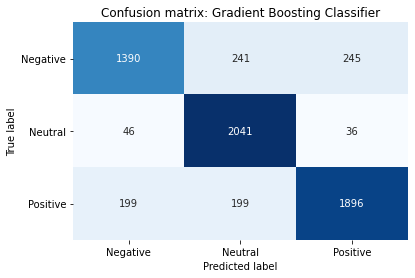

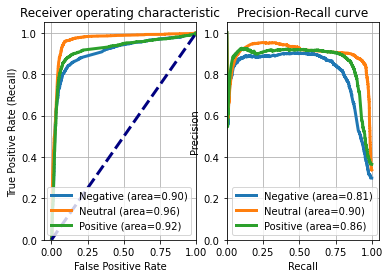

              precision    recall  f1-score   support

    Negative       0.85      0.74      0.79      1876
     Neutral       0.82      0.96      0.89      2123
    Positive       0.87      0.83      0.85      2294

    accuracy                           0.85      6293
   macro avg       0.85      0.84      0.84      6293
weighted avg       0.85      0.85      0.84      6293



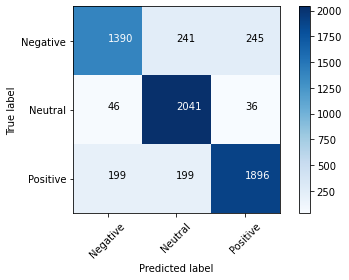

In [24]:
### build a pipeline
gb = Pipeline([
    ('vectorizer', TfidfVectorizer()), #max_df=0.7, min_df=4,use_idf=False)
    ('classifier', GradientBoostingClassifier(random_state=14)),])


### define parameters to be tested usign k-fold CV
gb_params = {'classifier__learning_rate': [0.09,1.0],
              'classifier__max_depth' : [11,15,19],
              'classifier__subsample' : [0.5,0.6,0.7],
              'vectorizer__use_idf': [True, False],}
 
### perform gridsearch using clf and params
gb_gs = HalvingGridSearchCV(gb,gb_params,cv=5, verbose=1,n_jobs=-1,factor=2)#5-fold, computation will be dispatched on all the CPUs


### train best estimator on traning data 
gb_gs = gb_gs.fit(X_train, y_train)
print('Best score on testing data:',gb_gs.score(X_test, y_test))
print('Best score on training data:',gb_gs.score(X_train, y_train))
print('Best score',gb_gs.best_score_)
print('Best parameters',gb_gs.best_params_)


## test classifier 
y_pred = gb_gs.best_estimator_.predict(X_test)
predicted_prob = gb_gs.best_estimator_.predict_proba(X_test)



############################################## Evaluation ####################################################

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values


### Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Gradient Boosting Classifier Details:")
print(metrics.classification_report(y_test, y_pred))
    
    
    
### Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Predicted label", ylabel="True label", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix: Gradient Boosting Classifier")
plt.yticks(rotation=0)
fig, ax = plt.subplots(nrows=1, ncols=2)

### Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)

    
### Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()


### Confusion matrix vol 2.0
labels = ['Negative', 'Neutral', 'Positive'] 
print(classification_report(y_test, y_pred, labels)) #classification report from sklearn
cnf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues) #plot confusion matrix grid
threshold = cnf_matrix.max() / 2 #threshold to define text color
for i in range(cnf_matrix.shape[0]): #print text in grid
    for j in range(cnf_matrix.shape[1]): 
        plt.text(j, i, cnf_matrix[i,j], color="w" if cnf_matrix[i,j] > threshold else 'black')
tick_marks = np.arange(len(labels)) #define labeling spacing based on number of classes
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.tight_layout()

# Random Forrest 

n_iterations: 10
n_required_iterations: 12
n_possible_iterations: 10
min_resources_: 30
max_resources_: 25169
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 2592
n_resources: 30
Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
----------
iter: 1
n_candidates: 1296
n_resources: 60
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
----------
iter: 2
n_candidates: 648
n_resources: 120
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
----------
iter: 3
n_candidates: 324
n_resources: 240
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
----------
iter: 4
n_candidates: 162
n_resources: 480
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 5
n_candidates: 81
n_resources: 960
Fitting 5 folds for each of 81 candidates, totalling 405 fits
----------
iter: 6
n_candidates: 41
n_resources: 1920
Fitting 5 folds for each of 41 candidates, totalling 205 fits
----------
iter: 7
n_candid

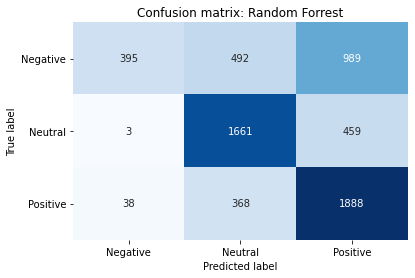

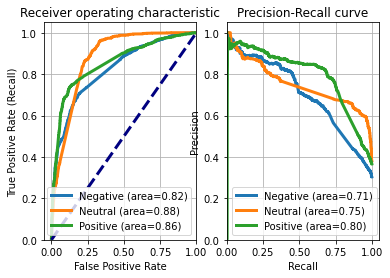

              precision    recall  f1-score   support

    Negative       0.91      0.21      0.34      1876
     Neutral       0.66      0.78      0.72      2123
    Positive       0.57      0.82      0.67      2294

    accuracy                           0.63      6293
   macro avg       0.71      0.61      0.58      6293
weighted avg       0.70      0.63      0.59      6293



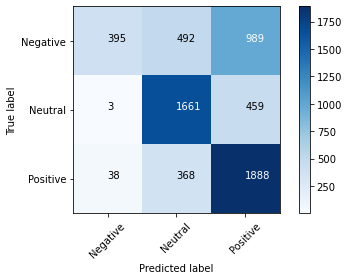

In [25]:
### build a pipeline
rf_pipe = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(random_state=14)),])
# see paramerts for model 
rf_pipe.get_params().keys()



### define parameters to be tested usign k-fold CV
rf_params = {'classifier__max_features': ['auto', 'sqrt', 'log2'],
             'classifier__n_estimators': [80,85, 90],
             'classifier__max_depth': [6,7,8],
             'vectorizer__min_df': [3,4,5,6],
             'classifier__min_samples_split': [3,4,5],            
             'vectorizer__stop_words': ['english', None],
             'vectorizer__use_idf': [True, False],
             'classifier__bootstrap': [False, True],}


### perform gridsearch using clf and params
rf_gs = HalvingGridSearchCV(rf_pipe,rf_params,cv=5,n_jobs=-1, verbose=1, scoring='accuracy', factor=2) #5-fold, n_jobs =-1 :computation will be dispatched on all the CPUs


### train best estimator on traning data 
rf_gs = rf_gs.fit(X_train, y_train)
print('Best score on testing data:',rf_gs.score(X_test, y_test))
print('Best score on training data:',rf_gs.score(X_train, y_train))
print('Best score',rf_gs.best_score_)
print('Best parameters',rf_gs.best_params_)


## test classifier 
y_pred = rf_gs.best_estimator_.predict(X_test)
predicted_prob = rf_gs.best_estimator_.predict_proba(X_test)



############################################## Evaluation ####################################################

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values


### Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Random Forrest Details:")
print(metrics.classification_report(y_test, y_pred))
    
    
    
### Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Predicted label", ylabel="True label", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix: Random Forrest")
plt.yticks(rotation=0)
fig, ax = plt.subplots(nrows=1, ncols=2)

### Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)

    
### Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()


### Confusion matrix vol 2.0
labels = ['Negative', 'Neutral', 'Positive'] 
print(classification_report(y_test, y_pred, labels)) #classification report from sklearn
cnf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues) #plot confusion matrix grid
threshold = cnf_matrix.max() / 2 #threshold to define text color
for i in range(cnf_matrix.shape[0]): #print text in grid
    for j in range(cnf_matrix.shape[1]): 
        plt.text(j, i, cnf_matrix[i,j], color="w" if cnf_matrix[i,j] > threshold else 'black')
tick_marks = np.arange(len(labels)) #define labeling spacing based on number of classes
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.tight_layout()

# Bagging Classifier 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 51.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s finished


Best score on testing data: 0.8452248530112824


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score on training data: 0.9941992133179706
Best score nan
Best parameters {'classifier__max_features': 2800, 'classifier__n_estimators': 750, 'vectorizer__max_df': 0.7, 'vectorizer__min_df': 6, 'vectorizer__use_idf': True}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s finished


Accuracy: 0.85
Auc: 0.93
Bagging Classifier Details:
              precision    recall  f1-score   support

    Negative       0.83      0.73      0.78      1876
     Neutral       0.84      0.96      0.90      2123
    Positive       0.86      0.84      0.85      2294

    accuracy                           0.85      6293
   macro avg       0.84      0.84      0.84      6293
weighted avg       0.84      0.85      0.84      6293



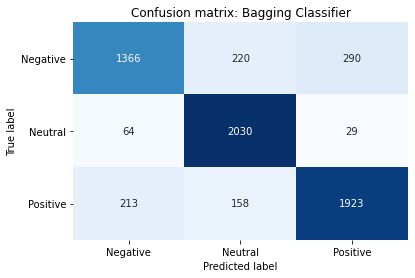

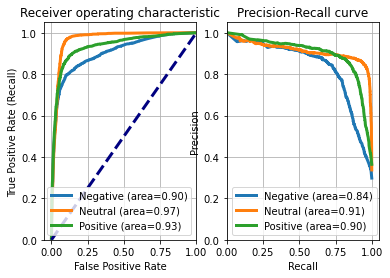

              precision    recall  f1-score   support

    Negative       0.83      0.73      0.78      1876
     Neutral       0.84      0.96      0.90      2123
    Positive       0.86      0.84      0.85      2294

    accuracy                           0.85      6293
   macro avg       0.84      0.84      0.84      6293
weighted avg       0.84      0.85      0.84      6293



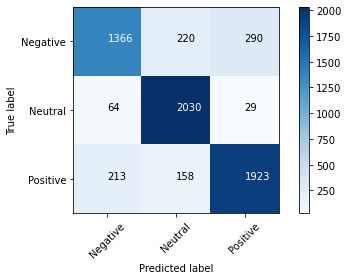

In [21]:
### build a pipeline
bag_pipe = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', BaggingClassifier(random_state=14, verbose=True)),])
# see paramerts for model 
bag_pipe.get_params().keys()



### define parameters to be tested usign k-fold CV
bag_params = {'classifier__n_estimators': [ 250,500, 750],
              'classifier__max_features' : [2700, 2800],
             'vectorizer__max_df': (0.6,0.7),
             'vectorizer__min_df': [4,5,6],
             'vectorizer__use_idf': [True, False],}


### perform gridsearch using clf and params
bag_gs = HalvingGridSearchCV(bag_pipe,bag_params,cv=5,n_jobs=-1, verbose=0, factor=2) #5-fold, n_jobs =-1 :computation will be dispatched on all the CPUs
                             
                             
### train best estimator on traning data 
bag_gs = bag_gs.fit(X_train, y_train)
print('Best score on testing data:',bag_gs.score(X_test, y_test))
print('Best score on training data:',bag_gs.score(X_train, y_train))
print('Best score',bag_gs.best_score_)
print('Best parameters',bag_gs.best_params_)


## test classifier 
y_pred = bag_gs.best_estimator_.predict(X_test)
predicted_prob = bag_gs.best_estimator_.predict_proba(X_test)



############################################## Evaluation ####################################################

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values


### Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Bagging Classifier Details:")
print(metrics.classification_report(y_test, y_pred))
    
    
    
### Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Predicted label", ylabel="True label", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix: Bagging Classifier")
plt.yticks(rotation=0)
fig, ax = plt.subplots(nrows=1, ncols=2)

### Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)

    
### Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()


### Confusion matrix vol 2.0
labels = ['Negative', 'Neutral', 'Positive'] 
print(classification_report(y_test, y_pred, labels)) #classification report from sklearn
cnf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues) #plot confusion matrix grid
threshold = cnf_matrix.max() / 2 #threshold to define text color
for i in range(cnf_matrix.shape[0]): #print text in grid
    for j in range(cnf_matrix.shape[1]): 
        plt.text(j, i, cnf_matrix[i,j], color="w" if cnf_matrix[i,j] > threshold else 'black')
tick_marks = np.arange(len(labels)) #define labeling spacing based on number of classes
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.tight_layout()

In [19]:
tree_gs.get_params()

{'aggressive_elimination': False,
 'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('vectorizer', TfidfVectorizer()),
  ('classifier', DecisionTreeClassifier(random_state=0))],
 'estimator__verbose': False,
 'estimator__vectorizer': TfidfVectorizer(),
 'estimator__classifier': DecisionTreeClassifier(random_state=0),
 'estimator__vectorizer__analyzer': 'word',
 'estimator__vectorizer__binary': False,
 'estimator__vectorizer__decode_error': 'strict',
 'estimator__vectorizer__dtype': numpy.float64,
 'estimator__vectorizer__encoding': 'utf-8',
 'estimator__vectorizer__input': 'content',
 'estimator__vectorizer__lowercase': True,
 'estimator__vectorizer__max_df': 1.0,
 'estimator__vectorizer__max_features': None,
 'estimator__vectorizer__min_df': 1,
 'estimator__vectorizer__ngram_range': (1, 1),
 'estimator__vectorizer__norm': 'l2',
 'estimator__vectorizer__preprocessor': None,
 'estimator__vectorizer__smooth_idf': True,
 'estimator__vectorizer__stop_words': 

# Decision Tree Classifier : Non-pruned 

n_iterations: 10
n_required_iterations: 13
n_possible_iterations: 10
min_resources_: 30
max_resources_: 25169
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 4368
n_resources: 30
Fitting 5 folds for each of 4368 candidates, totalling 21840 fits
----------
iter: 1
n_candidates: 2184
n_resources: 60
Fitting 5 folds for each of 2184 candidates, totalling 10920 fits
----------
iter: 2
n_candidates: 1092
n_resources: 120
Fitting 5 folds for each of 1092 candidates, totalling 5460 fits
----------
iter: 3
n_candidates: 546
n_resources: 240
Fitting 5 folds for each of 546 candidates, totalling 2730 fits
----------
iter: 4
n_candidates: 273
n_resources: 480
Fitting 5 folds for each of 273 candidates, totalling 1365 fits
----------
iter: 5
n_candidates: 137
n_resources: 960
Fitting 5 folds for each of 137 candidates, totalling 685 fits
----------
iter: 6
n_candidates: 69
n_resources: 1920
Fitting 5 folds for each of 69 candidates, totalling 345 fits
----------
iter: 7
n_

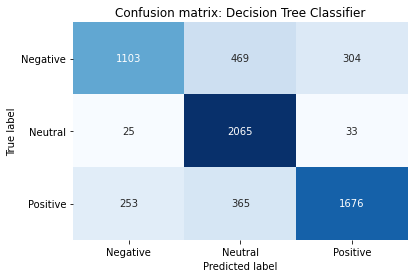

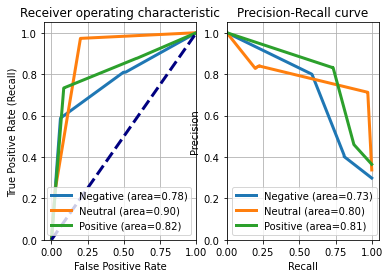

              precision    recall  f1-score   support

    Negative       0.80      0.59      0.68      1876
     Neutral       0.71      0.97      0.82      2123
    Positive       0.83      0.73      0.78      2294

    accuracy                           0.77      6293
   macro avg       0.78      0.76      0.76      6293
weighted avg       0.78      0.77      0.76      6293



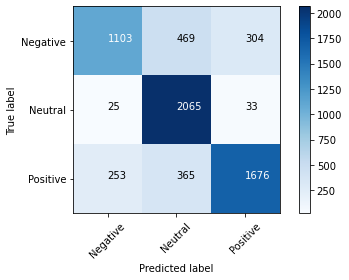

In [26]:
### build a pipeline
tree_pipe = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', DecisionTreeClassifier(random_state=0)),])
# see paramerts for model 
tree_pipe.get_params().keys()


### define parameters to be tested usign k-fold CV
tree_params = {'classifier__criterion': ['gini','entropy'],
             'classifier__max_depth': range(109,200),
             'vectorizer__max_df': (0.6, 0.7,0.8),
             'vectorizer__min_df': [2,3],
             'vectorizer__stop_words': ['english', None],
             'vectorizer__use_idf': [True, False],
            }

### perform gridsearch using clf and params
tree_gs = HalvingGridSearchCV(tree_pipe,tree_params,cv=5,n_jobs=-1, verbose=1,scoring='accuracy', factor=2) #5-fold, n_jobs =-1 :computation will be dispatched on all the CPUs


### train best estimator on traning data 
tree_gs = tree_gs.fit(X_train, y_train)
print('Best score on testing data:',tree_gs.score(X_test, y_test))
print('Best score on training data:',tree_gs.score(X_train, y_train))
print('Best score',tree_gs.best_score_)
print('Best parameters',tree_gs.best_params_)


## test classifier 
y_pred = tree_gs.best_estimator_.predict(X_test)
predicted_prob = tree_gs.best_estimator_.predict_proba(X_test)



############################################## Evaluation ####################################################

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values


### Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Decision Tree Details:")
print(metrics.classification_report(y_test, y_pred))
    
   
# plot condusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Predicted label", ylabel="True label", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix: Decision Tree Classifier")
plt.yticks(rotation=0)
fig, ax = plt.subplots(nrows=1, ncols=2)


### Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)

    
### Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()


### Confusion matrix vol 2.0
labels = ['Negative', 'Neutral', 'Positive'] 
print(classification_report(y_test, y_pred, labels)) #classification report from sklearn
cnf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues) #plot confusion matrix grid
threshold = cnf_matrix.max() / 2 #threshold to define text color
for i in range(cnf_matrix.shape[0]): #print text in grid
    for j in range(cnf_matrix.shape[1]): 
        plt.text(j, i, cnf_matrix[i,j], color="w" if cnf_matrix[i,j] > threshold else 'black')
tick_marks = np.arange(len(labels)) #define labeling spacing based on number of classes
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.tight_layout()
